In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
#reading the data
df = pd.read_csv('Company_Data.csv')
df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.shape

(400, 11)

In [6]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

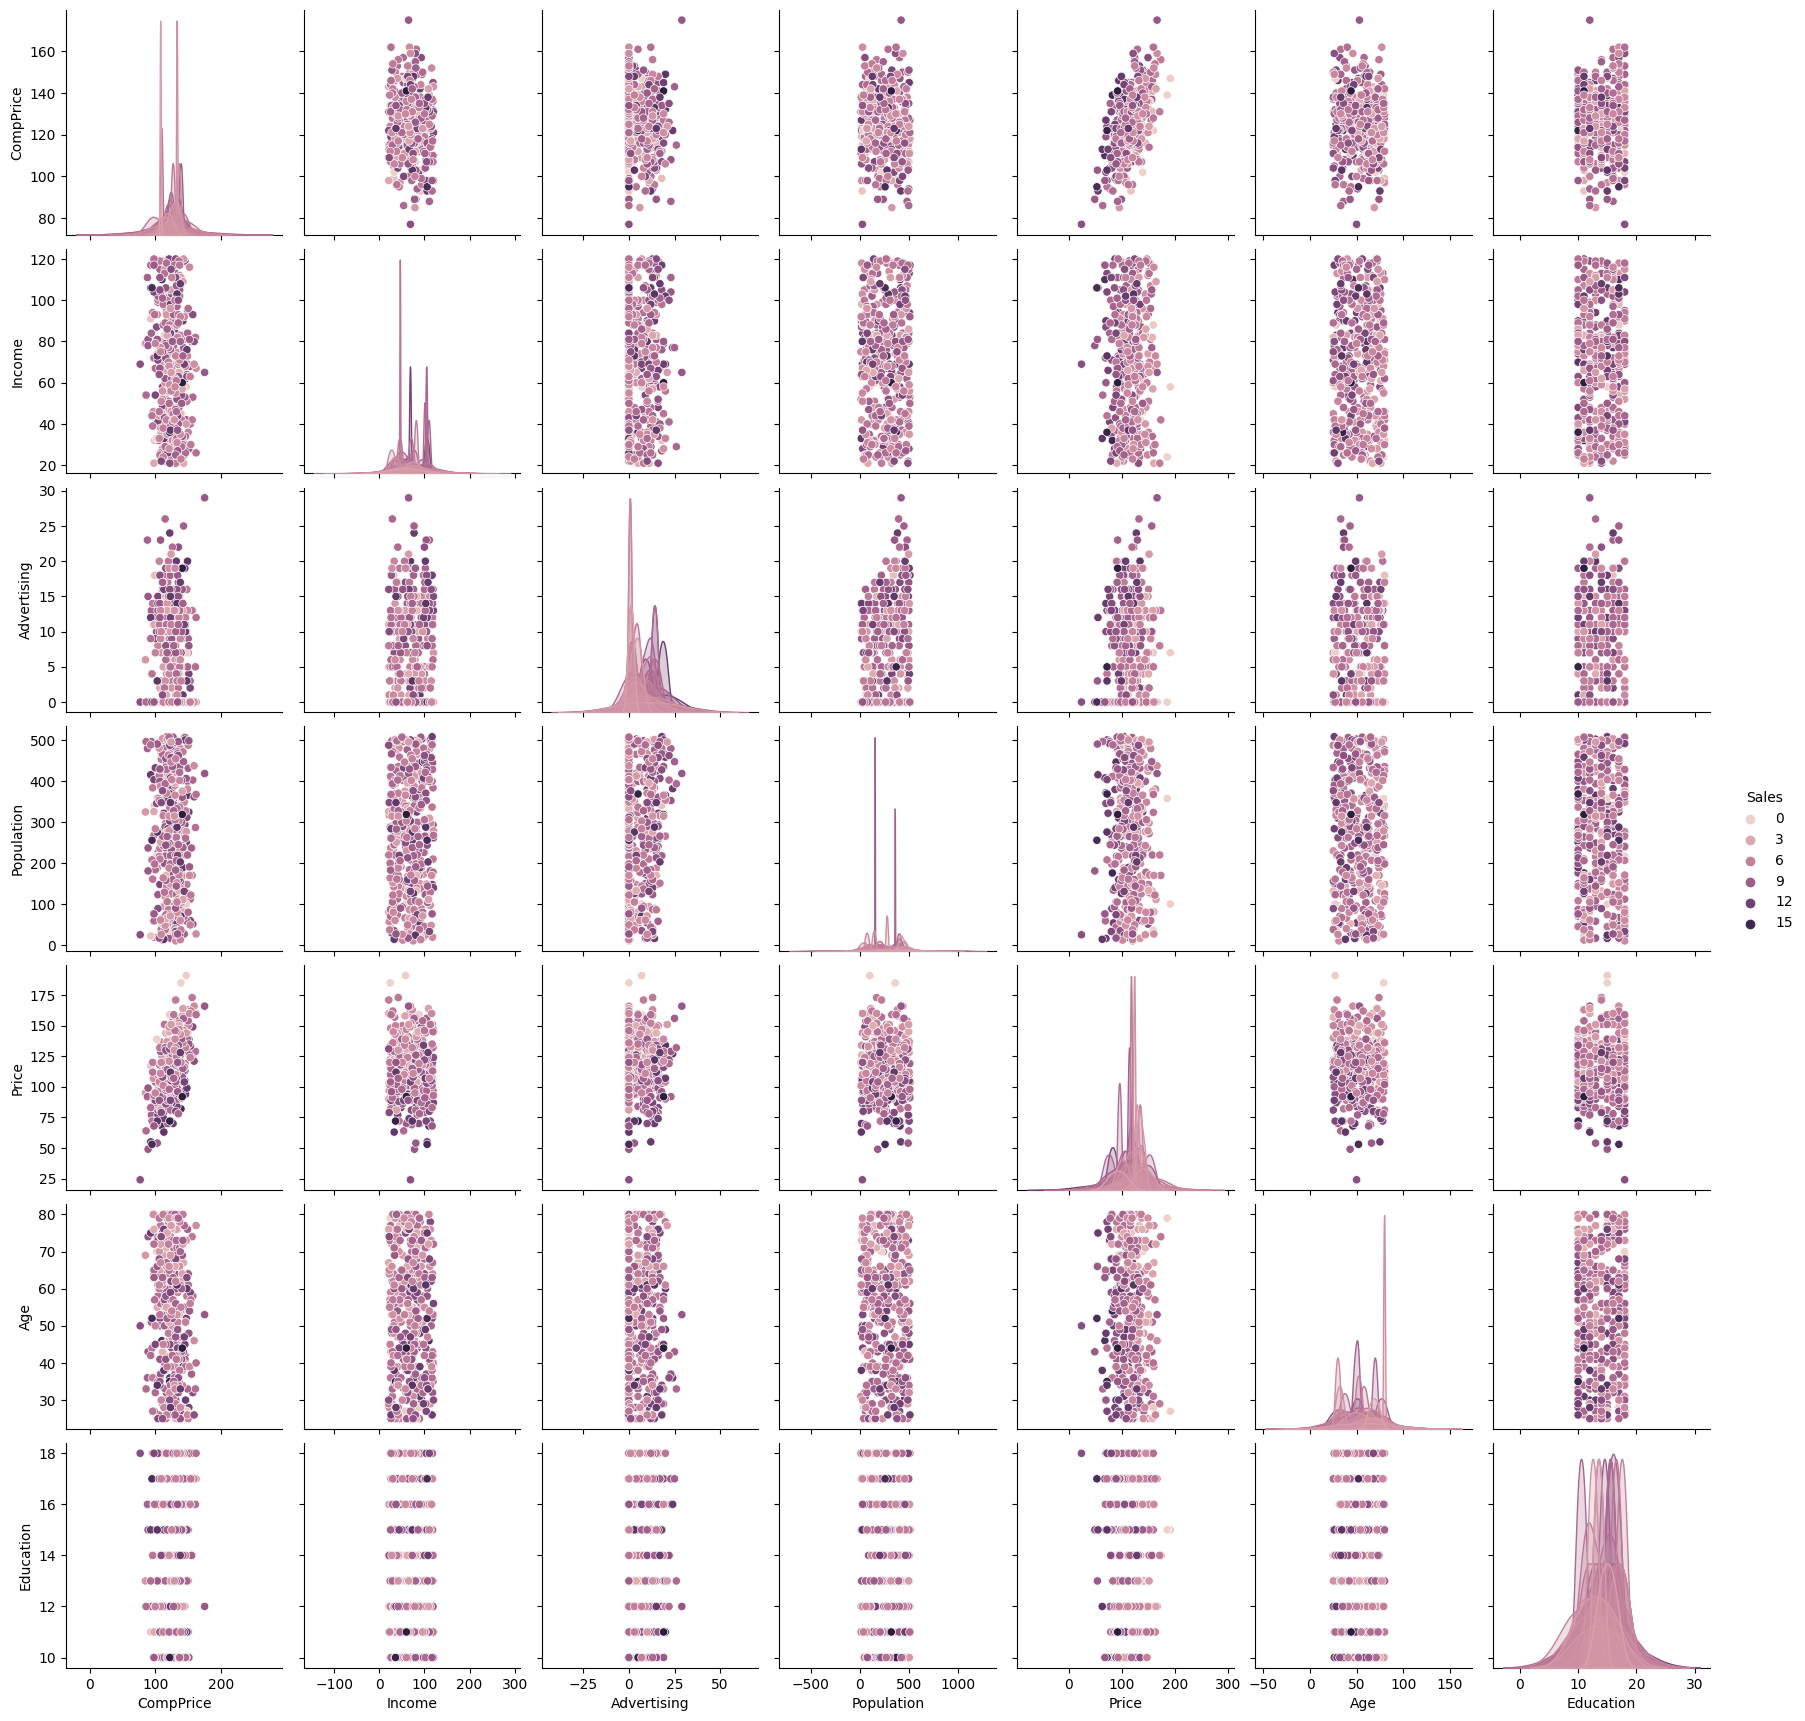

In [7]:
# pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Sales')

In [8]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [9]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [10]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_Yes    400 non-null    uint8  
 10  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [12]:
df1 = df['Sales']

In [13]:
df1

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [14]:
df['Sales'] = pd.cut(df1, bins=4,labels=False, include_lowest=True)

In [15]:
df['Sales']

0      2
1      2
2      2
3      1
4      1
      ..
395    3
396    1
397    1
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [16]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,2,138,73,11,276,120,Bad,42,17,1,1
1,2,111,48,16,260,83,Good,65,10,1,1
2,2,113,35,10,269,80,Medium,59,12,1,1
3,1,117,100,4,466,97,Medium,55,14,1,1
4,1,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,3,138,108,17,203,128,Good,33,14,1,1
396,1,139,23,3,37,120,Medium,55,11,0,1
397,1,162,26,12,368,159,Medium,40,18,1,1
398,1,100,79,7,284,95,Bad,50,12,1,1


In [17]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [18]:
df.head(400)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,2,138,73,11,276,120,Bad,42,17,1,1
1,2,111,48,16,260,83,Good,65,10,1,1
2,2,113,35,10,269,80,Medium,59,12,1,1
3,1,117,100,4,466,97,Medium,55,14,1,1
4,1,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,3,138,108,17,203,128,Good,33,14,1,1
396,1,139,23,3,37,120,Medium,55,11,0,1
397,1,162,26,12,368,159,Medium,40,18,1,1
398,1,100,79,7,284,95,Bad,50,12,1,1


In [19]:
x=df.iloc[:,1:6]
y=df['Sales']

In [20]:
x

,CompPrice,Income,Advertising,Population,Price
0,138,73,11,276,120
1,111,48,16,260,83
2,113,35,10,269,80
3,117,100,4,466,97
4,141,64,3,340,128
...,...,...,...,...,...
395,138,108,17,203,128
396,139,23,3,37,120
397,162,26,12,368,159
398,100,79,7,284,95


In [21]:
y

0      2
1      2
2      2
3      1
4      1
      ..
395    3
396    1
397    1
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [22]:
df['Sales'].unique()

array([2, 1, 0, 3])

In [23]:
df.Sales.value_counts()

1    205
2    136
0     36
3     23
Name: Sales, dtype: int64

In [24]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

Building Decision Tree Classifier using Entropy Criteria

In [25]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)


In [26]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [39]:
model.score(x_test,y_test)

0.5625

In [40]:
from sklearn import tree

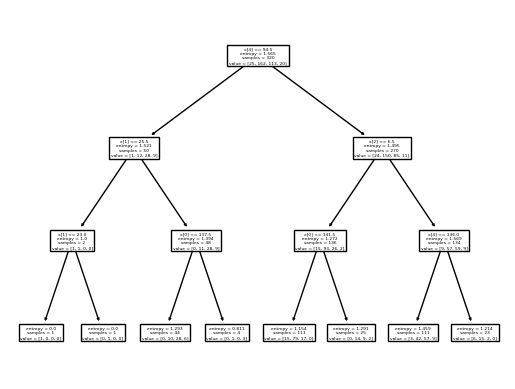

In [41]:
#plot the decision tree
tree.plot_tree(model);

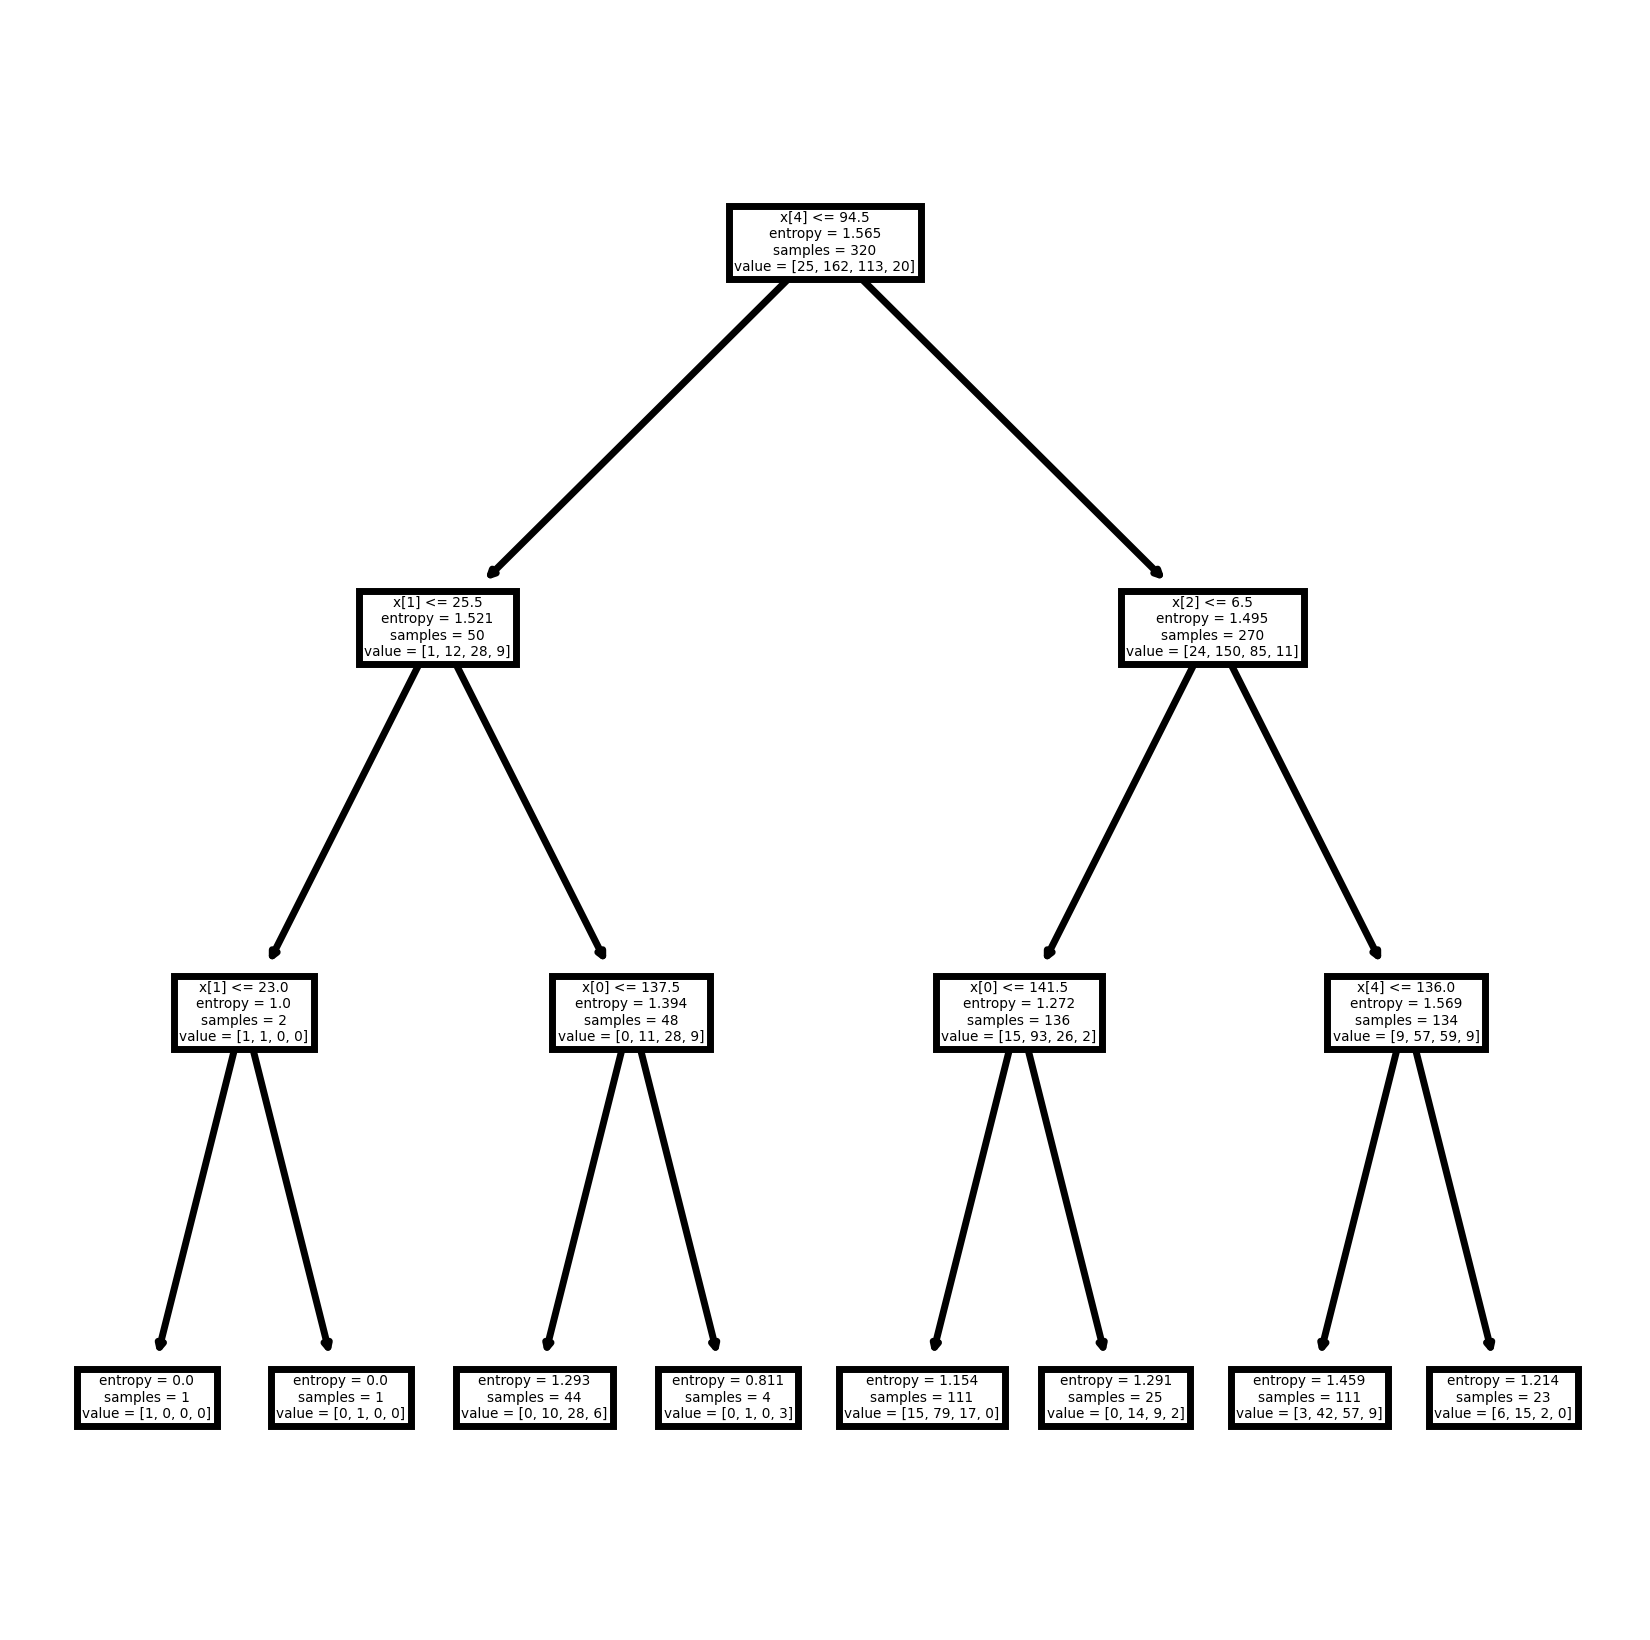

In [58]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model);

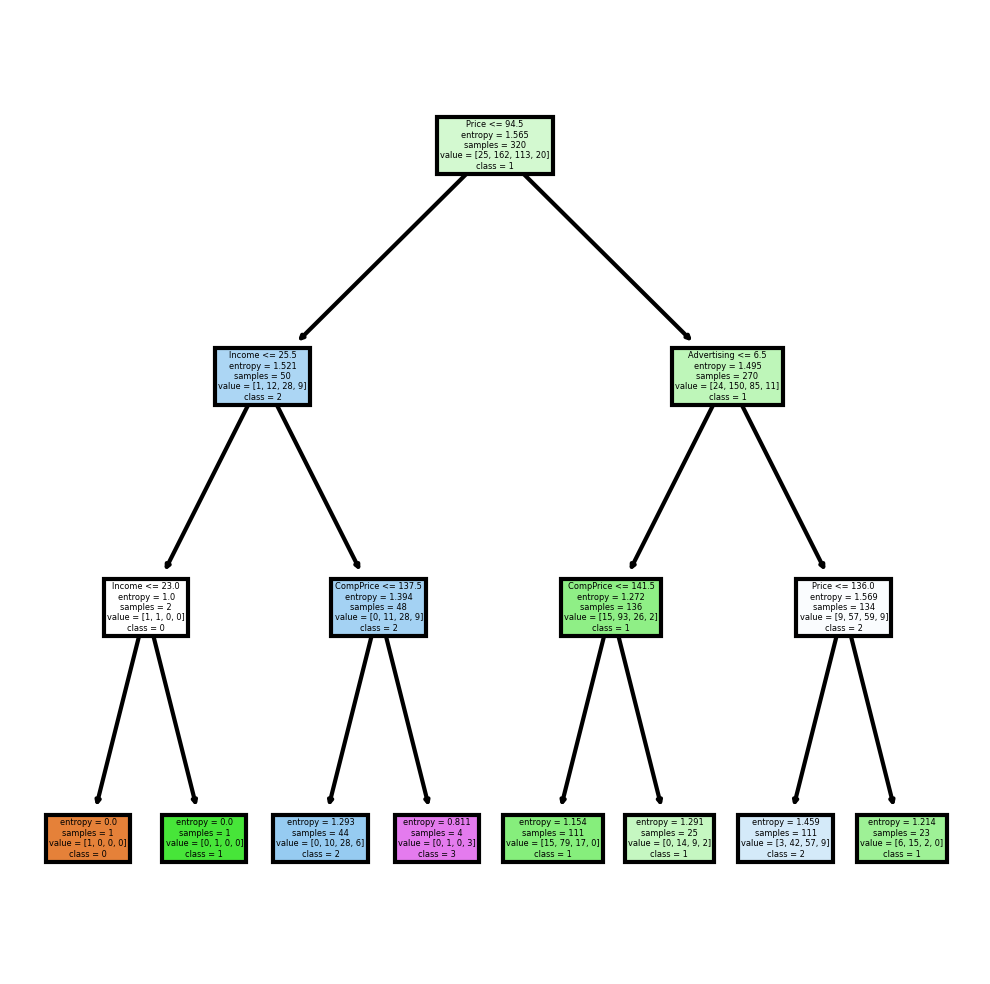

In [42]:
fn=['CompPrice','Income','Advertising','Population','Price']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [30]:
#predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    43
2    35
3     1
0     1
dtype: int64

In [31]:
preds

array([2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 3,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2])

In [32]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3
Sales,,,,
0,0,9,2,0
1,0,29,14,0
2,1,5,16,1
3,0,0,3,0


In [33]:
#accuracy
np.mean(preds==y_test)

0.5625

Building Decision Tree classifier using Gini criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5625

In [37]:
model_gini.score(x_test,y_test)

0.575

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#accuracy
model.score(X_test,y_test)

-1.2386037164950032

DECISIONFRAUDCHECK

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [62]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [64]:
fraud = pd.read_csv("Fraud_check.csv")

In [65]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [66]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [67]:
##Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [68]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])


In [69]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [70]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [71]:
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


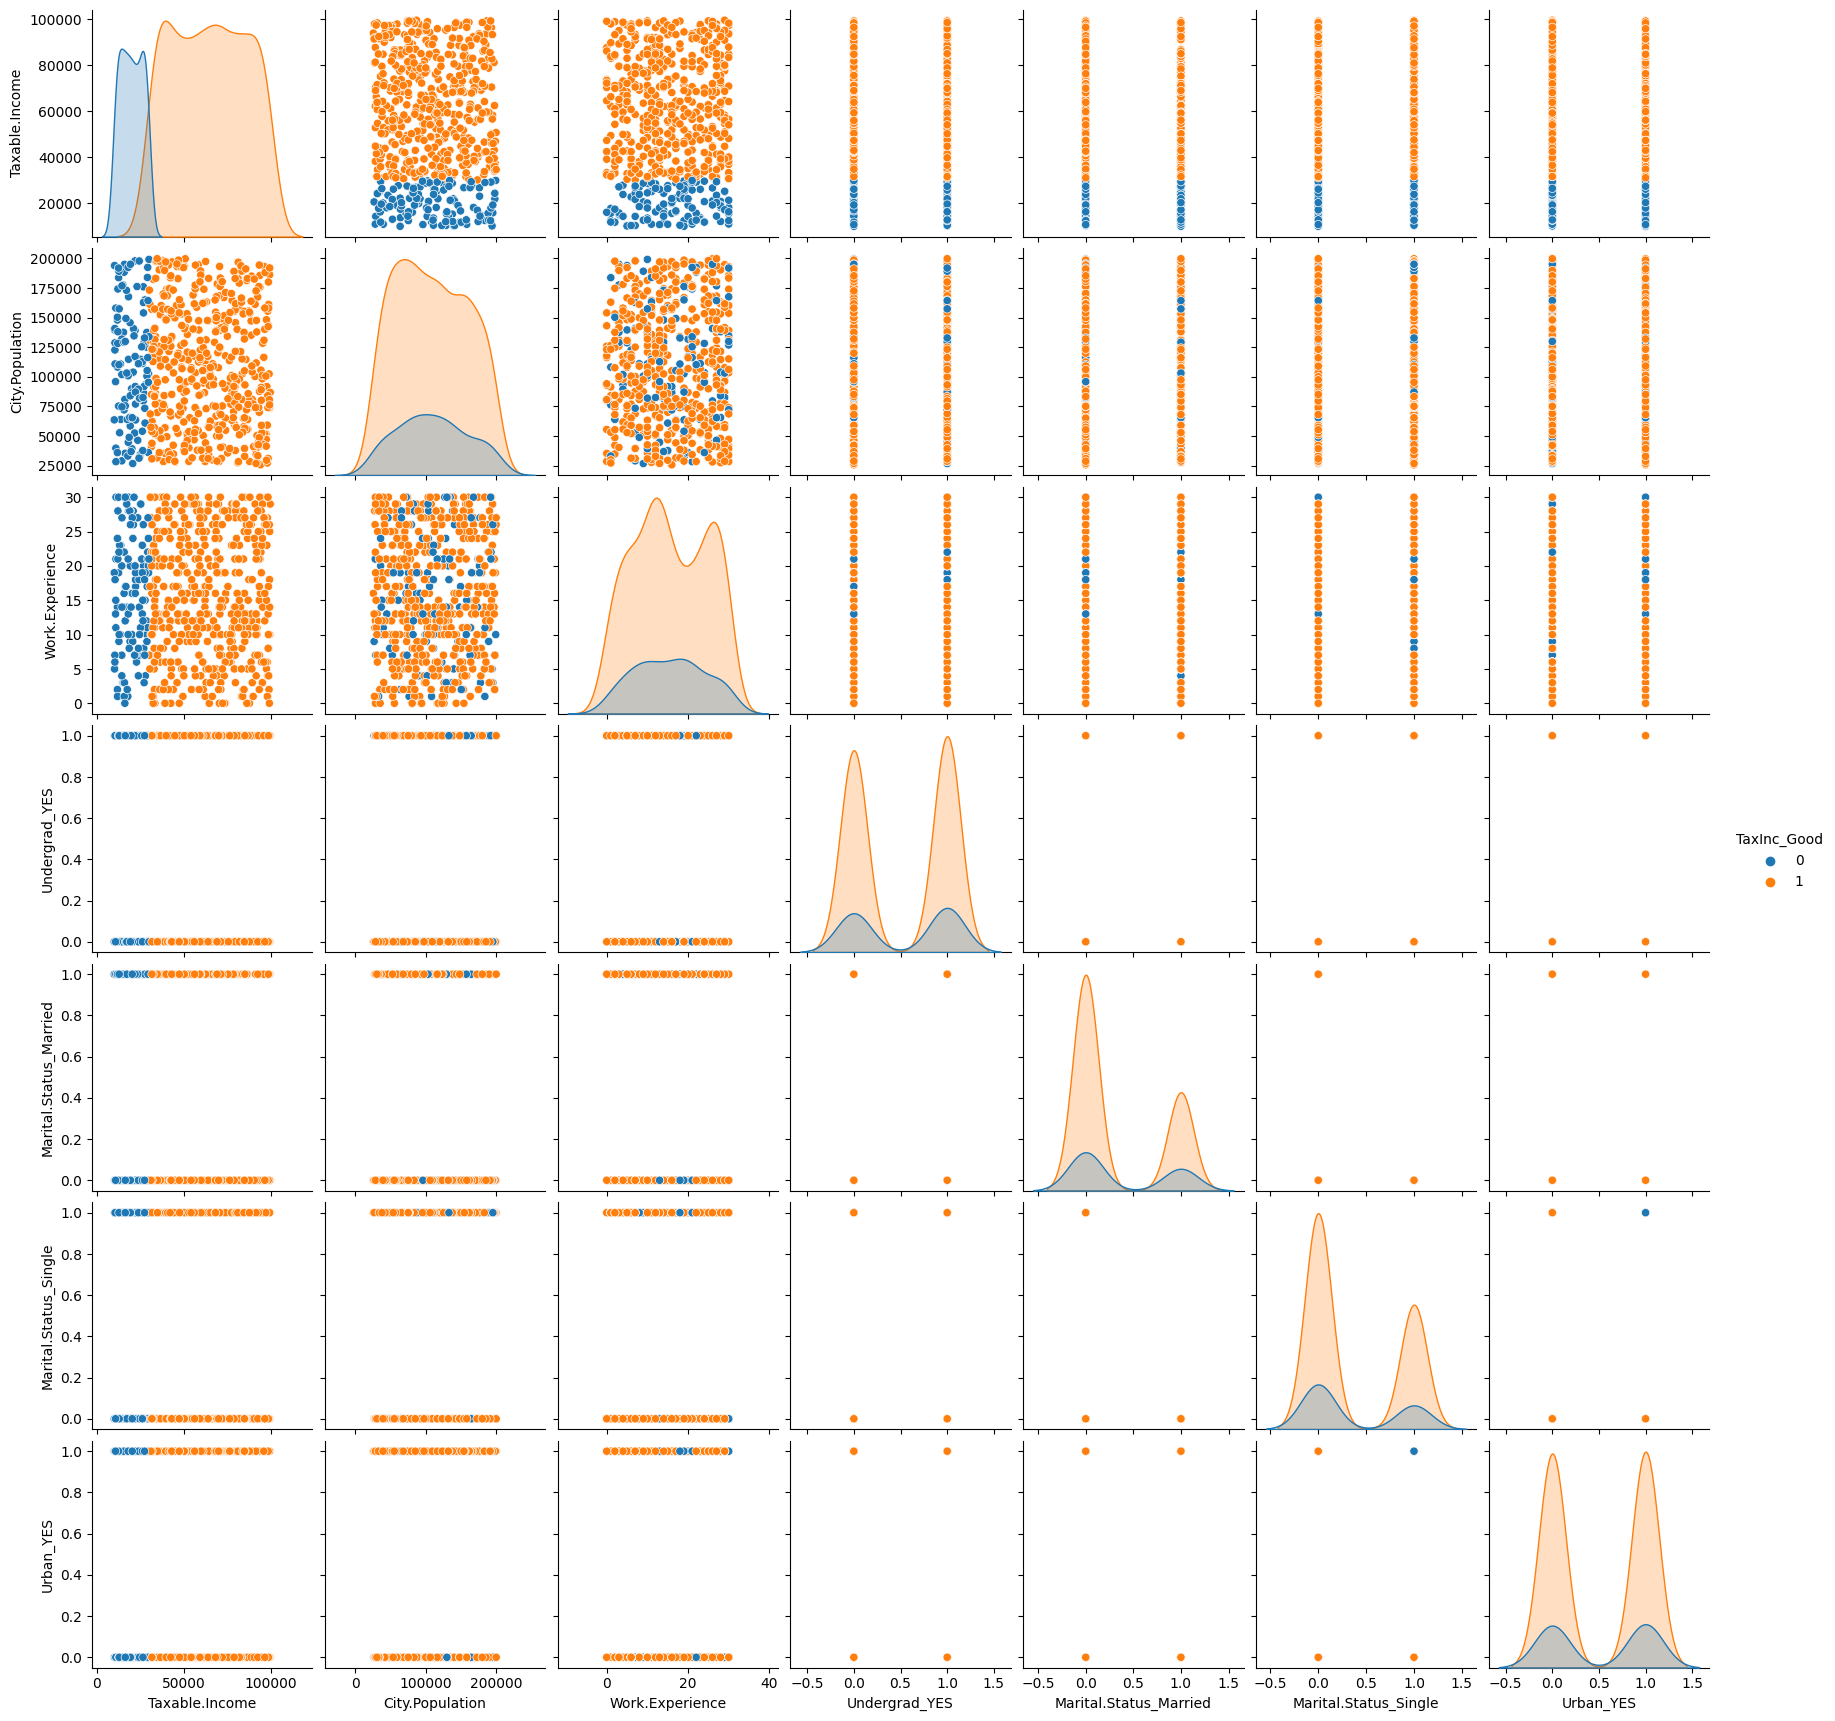

In [72]:
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [73]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [74]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [75]:
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)


In [78]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [79]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [80]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [81]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass


In [82]:
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [83]:
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


In [88]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [90]:
model.estimators_
model.classes_
model.n_classes_

2

In [91]:
model.n_outputs_

1

In [92]:
model.oob_score_

0.5166666666666667

In [93]:
prediction = model.predict(x_train)

In [94]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [95]:
np.mean(prediction == y_train)

0.98125

In [96]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [97]:
pred_test = model.predict(x_test)

In [98]:
acc_test =accuracy_score(y_test,pred_test)

In [99]:
acc_test

0.48333333333333334

In [100]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [101]:
tree = model.estimators_[5]

In [102]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)


In [103]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Building Decision Tree Classifier using Entropy Criteria

In [104]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [105]:
from sklearn import tree

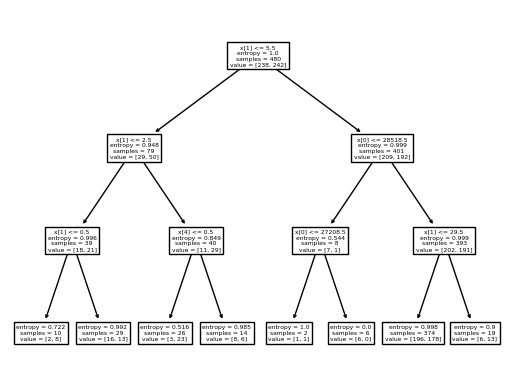

In [106]:
tree.plot_tree(model);

In [107]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

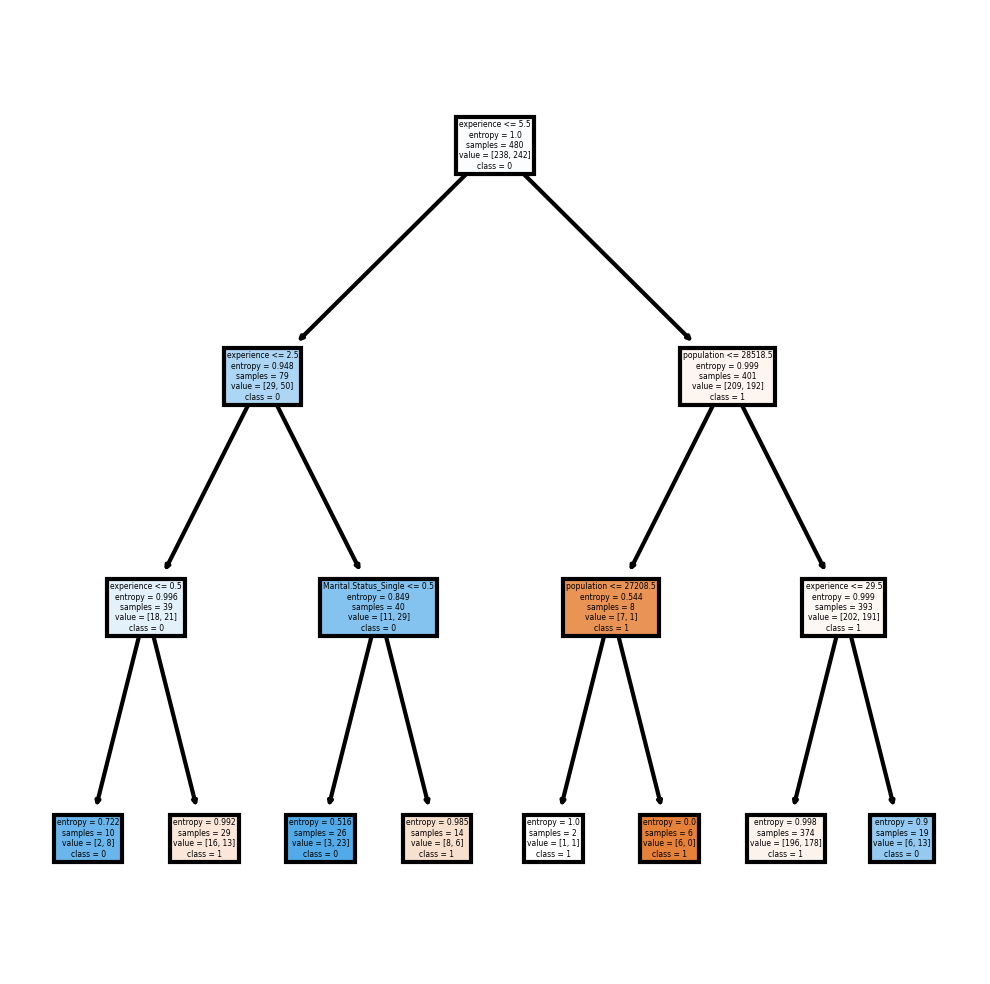

In [115]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [116]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    105
1     15
dtype: int64

In [117]:
preds

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [118]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,52,8
1,53,7


In [119]:
np.mean(preds==y_test)

0.49166666666666664

Building Decision Tree Classifier using Gini Criteria

In [120]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [121]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [122]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.49166666666666664

In [123]:
from sklearn.tree import DecisionTreeRegressor

In [124]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [126]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [127]:
model.score(X_test,y_test)

-0.9855410447761197